In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data

In [2]:
df_train = pd.read_csv("data/train.csv")
df_train

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [3]:
df_holiday = pd.read_csv("data/holidays_events.csv")
df_holiday

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [4]:
# date_holiday = df_holiday["date"]
# date_train = df_train["date"]

# Exploratory Data Analysis (EDA)

In [5]:
dates = pd.DataFrame()
dates["train"] = pd.to_datetime(df_train['date'])
dates["holiday"] = pd.to_datetime(df_holiday['date'])

In [6]:
dates

,train,holiday
0,2013-01-01,2012-03-02
1,2013-01-01,2012-04-01
2,2013-01-01,2012-04-12
3,2013-01-01,2012-04-14
4,2013-01-01,2012-04-21
...,...,...
3000883,2017-08-15,NaT
3000884,2017-08-15,NaT
3000885,2017-08-15,NaT
3000886,2017-08-15,NaT


In [7]:
df_train

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [8]:
df_train['date']

0          2013-01-01
1          2013-01-01
2          2013-01-01
3          2013-01-01
4          2013-01-01
              ...    
3000883    2017-08-15
3000884    2017-08-15
3000885    2017-08-15
3000886    2017-08-15
3000887    2017-08-15
Name: date, Length: 3000888, dtype: object

In [9]:
df_holiday['date']

0      2012-03-02
1      2012-04-01
2      2012-04-12
3      2012-04-14
4      2012-04-21
          ...    
345    2017-12-22
346    2017-12-23
347    2017-12-24
348    2017-12-25
349    2017-12-26
Name: date, Length: 350, dtype: object

In [10]:
df_train['date'] = pd.to_datetime(df_train['date'])
df_holiday['date'] = pd.to_datetime(df_holiday['date'])

In [11]:
year = dates['train'].dt.year
grouped = year.groupby(year)
grouped
count_per_year = grouped.size()
count_per_year

train
2013    648648
2014    648648
2015    648648
2016    650430
2017    404514
Name: train, dtype: int64

In [12]:
h_year = dates['holiday'].dt.year
h_grouped = h_year.groupby(h_year)
h_grouped
h_count_per_year = h_grouped.size()
h_count_per_year

holiday
2012.0    41
2013.0    51
2014.0    67
2015.0    52
2016.0    86
2017.0    53
Name: holiday, dtype: int64

In [13]:
df_holiday = df_holiday[df_holiday['date'].dt.year != 2012]
df_holiday

,date,type,locale,locale_name,description,transferred
41,2013-01-01,Holiday,National,Ecuador,Primer dia del ano,False
42,2013-01-05,Work Day,National,Ecuador,Recupero puente Navidad,False
43,2013-01-12,Work Day,National,Ecuador,Recupero puente primer dia del ano,False
44,2013-02-11,Holiday,National,Ecuador,Carnaval,False
45,2013-02-12,Holiday,National,Ecuador,Carnaval,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [41]:
df_train['holiday'] = False
merged_df = df_train.merge(df_holiday, on='date', how='inner')
df_train.loc[merged_df.index, 'holiday'] = True

C:\Users\samee\AppData\Local\Temp\ipykernel_15096\1478325079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['holiday'] = False


In [42]:
print(len(df_train))
len(df_train[df_train['holiday']==True])

90936


13608

In [16]:
df_train

,id,date,store_nbr,family,sales,onpromotion,holiday
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,True
1,1,2013-01-01,1,BABY CARE,0.000,0,True
2,2,2013-01-01,1,BEAUTY,0.000,0,True
3,3,2013-01-01,1,BEVERAGES,0.000,0,True
4,4,2013-01-01,1,BOOKS,0.000,0,True
...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,False
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,False
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,False
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,False


In [17]:
family = df_train.groupby('family')
family.size()

family
AUTOMOTIVE                    90936
BABY CARE                     90936
BEAUTY                        90936
BEVERAGES                     90936
BOOKS                         90936
BREAD/BAKERY                  90936
CELEBRATION                   90936
CLEANING                      90936
DAIRY                         90936
DELI                          90936
EGGS                          90936
FROZEN FOODS                  90936
GROCERY I                     90936
GROCERY II                    90936
HARDWARE                      90936
HOME AND KITCHEN I            90936
HOME AND KITCHEN II           90936
HOME APPLIANCES               90936
HOME CARE                     90936
LADIESWEAR                    90936
LAWN AND GARDEN               90936
LINGERIE                      90936
LIQUOR,WINE,BEER              90936
MAGAZINES                     90936
MEATS                         90936
PERSONAL CARE                 90936
PET SUPPLIES                  90936
PLAYERS AND ELECTRONI

<Axes: xlabel='family'>

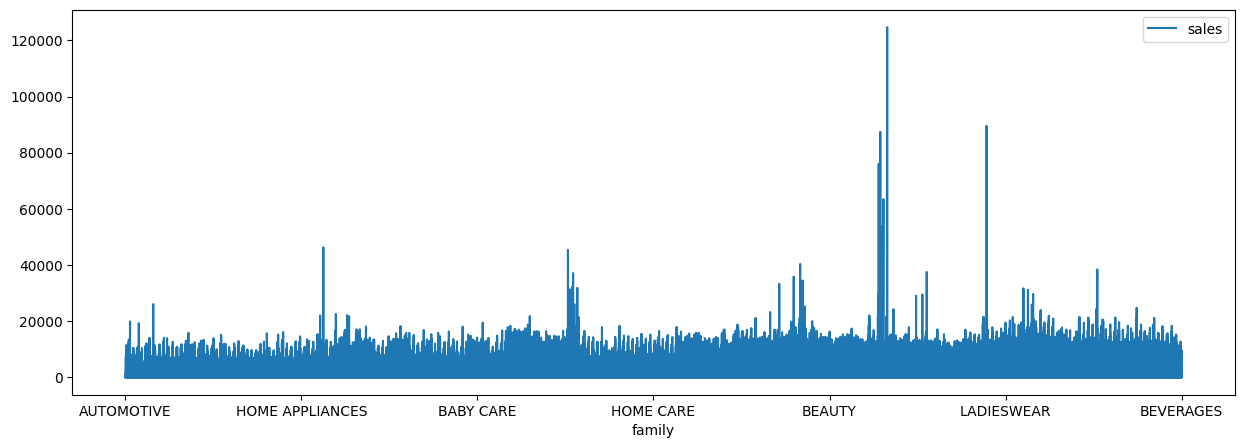

In [18]:
df_train.plot(x='family', y = 'sales', figsize=(15, 5))

In [19]:
df_train.set_index('date', inplace=True)
df_holiday.set_index('date', inplace=True)

In [20]:
df_train

,id,store_nbr,family,sales,onpromotion,holiday
date,,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.000,0,True
2013-01-01,1,1,BABY CARE,0.000,0,True
2013-01-01,2,1,BEAUTY,0.000,0,True
2013-01-01,3,1,BEVERAGES,0.000,0,True
2013-01-01,4,1,BOOKS,0.000,0,True
...,...,...,...,...,...,...
2017-08-15,3000883,9,POULTRY,438.133,0,False
2017-08-15,3000884,9,PREPARED FOODS,154.553,1,False
2017-08-15,3000885,9,PRODUCE,2419.729,148,False


<Axes: xlabel='date'>

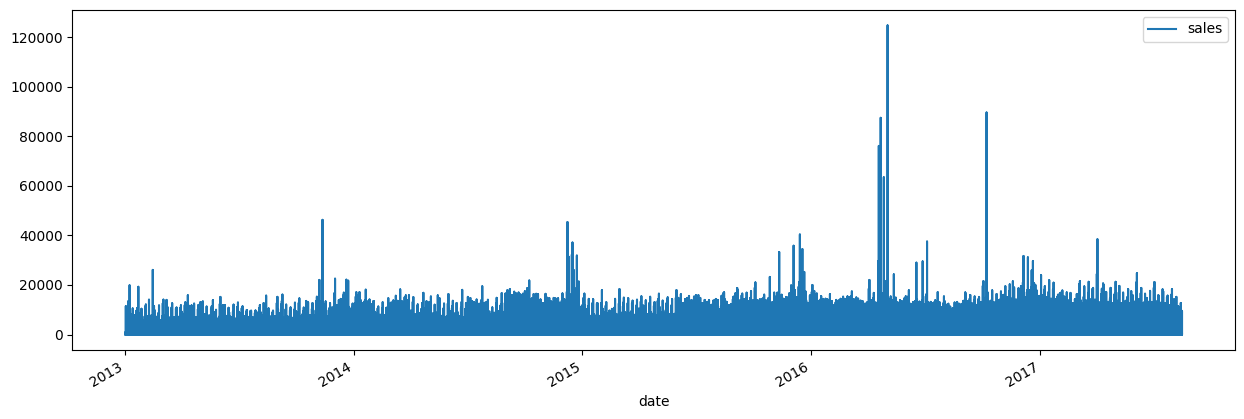

In [21]:
df_train.plot(y='sales', figsize=(15,5))

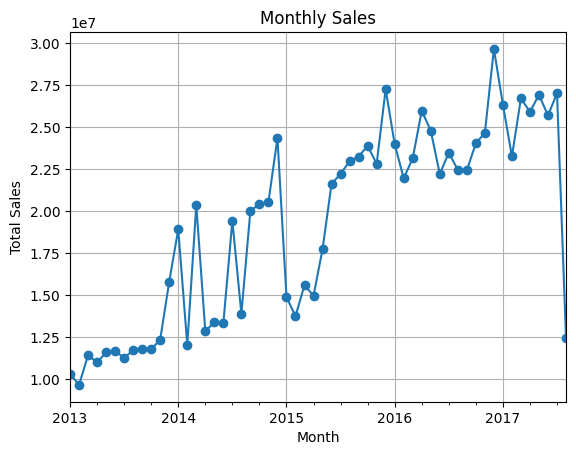

In [22]:
weekly_sales = df_train['sales'].resample('M').sum()
# plt.figure(figsize=(10, 6))
weekly_sales.plot(kind='line', marker='o', linestyle='-')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

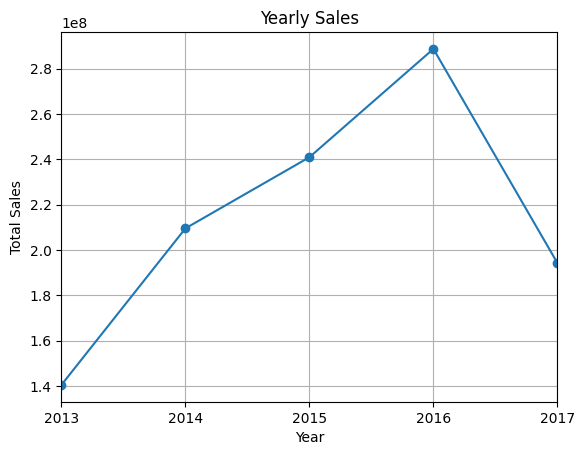

In [23]:
weekly_sales = df_train['sales'].resample('Y').sum()
# plt.figure(figsize=(10, 6))
weekly_sales.plot(kind='line', marker='o', linestyle='-')
plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

### check if holidays have affected the sales

In [24]:
sales_grouped = df_train.groupby(df_train.index.year)['sales'].sum().reset_index()
sales_grouped.columns = ['Year', 'Total Sales']

sales_grouped

,Year,Total Sales
0,2013,1.404190e+08
1,2014,2.094742e+08
2,2015,2.408801e+08
3,2016,2.886545e+08
4,2017,1.942171e+08


In [25]:
sales_grouped.sort_values(by="Total Sales", ascending=False)

,Year,Total Sales
3,2016,2.886545e+08
2,2015,2.408801e+08
1,2014,2.094742e+08
4,2017,1.942171e+08
0,2013,1.404190e+08


In [26]:
h_year = dates['holiday'].dt.year
h_grouped = h_year.groupby(h_year)
h_grouped
h_count_per_year = h_grouped.size()
h_count_per_year.sort_values(ascending=False)

holiday
2016.0    86
2014.0    67
2017.0    53
2015.0    52
2013.0    51
2012.0    41
Name: holiday, dtype: int64

One reason for most sales in 2016 can be highest number of holidays

Ploting Holiday Sales

In [27]:
holiday_sales = df_train[df_train["holiday"] == True]
holiday_sales

,id,store_nbr,family,sales,onpromotion,holiday
date,,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.000,0,True
2013-01-01,1,1,BABY CARE,0.000,0,True
2013-01-01,2,1,BEAUTY,0.000,0,True
2013-01-01,3,1,BEVERAGES,0.000,0,True
2013-01-01,4,1,BOOKS,0.000,0,True
...,...,...,...,...,...,...
2013-10-09,502519,9,POULTRY,249.424,0,True
2013-10-09,502520,9,PREPARED FOODS,63.000,0,True
2013-10-09,502521,9,PRODUCE,0.000,0,True


In [28]:
# holiday_sales.to_csv("Holiday Sales.csv")

In [29]:
holiday_sales_data = holiday_sales['sales']
holiday_sales_data

date
2013-01-01      0.000
2013-01-01      0.000
2013-01-01      0.000
2013-01-01      0.000
2013-01-01      0.000
               ...   
2013-10-09    249.424
2013-10-09     63.000
2013-10-09      0.000
2013-10-09      0.000
2013-10-09      2.082
Name: sales, Length: 502524, dtype: float64

In [30]:
holiday_dates = holiday_sales.index
holiday_dates

DatetimeIndex(['2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01',
               ...
               '2013-10-09', '2013-10-09', '2013-10-09', '2013-10-09',
               '2013-10-09', '2013-10-09', '2013-10-09', '2013-10-09',
               '2013-10-09', '2013-10-09'],
              dtype='datetime64[ns]', name='date', length=502524, freq=None)

In [31]:
holiday_sales_data.tail()

date
2013-10-09    249.424
2013-10-09     63.000
2013-10-09      0.000
2013-10-09      0.000
2013-10-09      2.082
Name: sales, dtype: float64

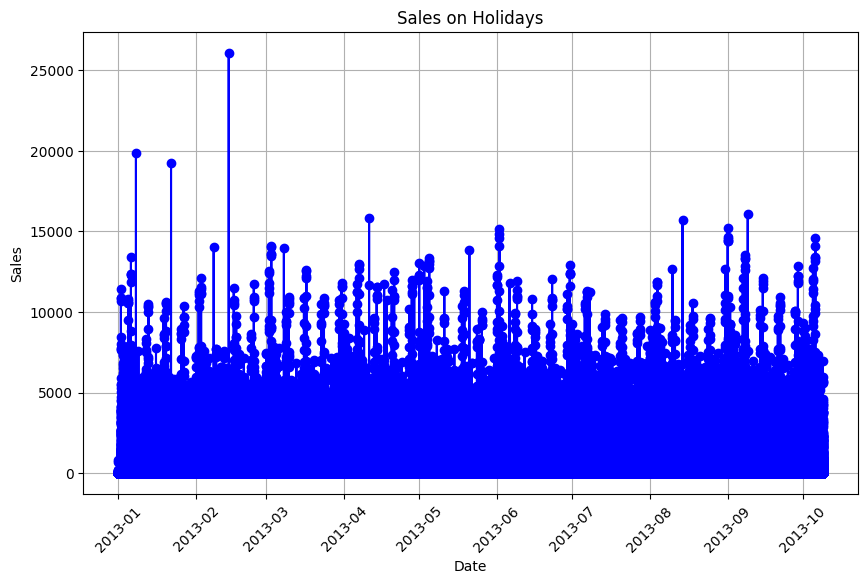

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(holiday_dates, holiday_sales_data, marker='o', linestyle='-', color='b')
plt.title('Sales on Holidays')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)

In [33]:
df_holiday.tail(10)

,type,locale,locale_name,description,transferred
date,,,,,
2017-12-06,Holiday,Local,Quito,Fundacion de Quito,True
2017-12-08,Holiday,Local,Loja,Fundacion de Loja,False
2017-12-08,Transfer,Local,Quito,Traslado Fundacion de Quito,False
2017-12-21,Additional,National,Ecuador,Navidad-4,False
2017-12-22,Holiday,Local,Salinas,Cantonizacion de Salinas,False
2017-12-22,Additional,National,Ecuador,Navidad-3,False
2017-12-23,Additional,National,Ecuador,Navidad-2,False
2017-12-24,Additional,National,Ecuador,Navidad-1,False
2017-12-25,Holiday,National,Ecuador,Navidad,False


In [34]:
df_train[df_train.index.year == 2016]

,id,store_nbr,family,sales,onpromotion,holiday
date,,,,,,
2016-01-01,1945944,1,AUTOMOTIVE,0.000,0,False
2016-01-01,1945945,1,BABY CARE,0.000,0,False
2016-01-01,1945946,1,BEAUTY,0.000,0,False
2016-01-01,1945947,1,BEVERAGES,0.000,0,False
2016-01-01,1945948,1,BOOKS,0.000,0,False
...,...,...,...,...,...,...
2016-12-31,2596369,9,POULTRY,687.853,1,False
2016-12-31,2596370,9,PREPARED FOODS,100.405,1,False
2016-12-31,2596371,9,PRODUCE,3091.356,3,False


In [35]:
df_holiday[df_holiday.index.year == 2016]

,type,locale,locale_name,description,transferred
date,,,,,
2016-01-01,Holiday,National,Ecuador,Primer dia del ano,False
2016-02-08,Holiday,National,Ecuador,Carnaval,False
2016-02-09,Holiday,National,Ecuador,Carnaval,False
2016-03-02,Holiday,Local,Manta,Fundacion de Manta,False
2016-03-25,Holiday,National,Ecuador,Viernes Santo,False
...,...,...,...,...,...
2016-12-23,Additional,National,Ecuador,Navidad-2,False
2016-12-24,Additional,National,Ecuador,Navidad-1,False
2016-12-25,Holiday,National,Ecuador,Navidad,False


In [36]:
df_train.dtypes

id               int64
store_nbr        int64
family          object
sales          float64
onpromotion      int64
holiday           bool
dtype: object

In [39]:
df_train = df_train[df_train['family'].str.strip().str.upper() == 'GROCERY I']

In [40]:
df_train

,id,store_nbr,family,sales,onpromotion,holiday
date,,,,,,
2013-01-01,12,1,GROCERY I,0.000,0,True
2013-01-01,45,10,GROCERY I,0.000,0,True
2013-01-01,78,11,GROCERY I,0.000,0,True
2013-01-01,111,12,GROCERY I,0.000,0,True
2013-01-01,144,13,GROCERY I,0.000,0,True
...,...,...,...,...,...,...
2017-08-15,3000735,54,GROCERY I,4235.000,44,False
2017-08-15,3000768,6,GROCERY I,4334.000,33,False
2017-08-15,3000801,7,GROCERY I,3678.000,34,False


In [44]:
holiday_dates = df_train.index[df_train['holiday'] == True].unique()
holiday_dates

DatetimeIndex(['2013-01-01', '2013-01-05', '2013-01-12', '2013-02-11',
               '2013-02-12', '2013-03-02', '2013-04-01', '2013-04-12',
               '2013-04-14', '2013-04-21',
               ...
               '2017-06-23', '2017-06-25', '2017-07-03', '2017-07-23',
               '2017-07-24', '2017-07-25', '2017-08-05', '2017-08-10',
               '2017-08-11', '2017-08-15'],
              dtype='datetime64[ns]', name='date', length=252, freq=None)

In [47]:
pd.DataFrame(holiday_dates_1)

,date
0,2013-01-01
1,2013-01-01
2,2013-01-01
3,2013-01-01
4,2013-01-01
...,...
13603,2017-08-15
13604,2017-08-15
13605,2017-08-15
13606,2017-08-15


In [46]:
holiday_dates_1 = df_train.index[df_train['holiday'] == True]
holiday_dates_1

DatetimeIndex(['2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01',
               ...
               '2017-08-15', '2017-08-15', '2017-08-15', '2017-08-15',
               '2017-08-15', '2017-08-15', '2017-08-15', '2017-08-15',
               '2017-08-15', '2017-08-15'],
              dtype='datetime64[ns]', name='date', length=13608, freq=None)

In [49]:
sales_data = df_train.loc[holiday_dates]
sales_data

,id,store_nbr,family,sales,onpromotion,holiday
date,,,,,,
2013-01-01,12,1,GROCERY I,0.000,0,True
2013-01-01,45,10,GROCERY I,0.000,0,True
2013-01-01,78,11,GROCERY I,0.000,0,True
2013-01-01,111,12,GROCERY I,0.000,0,True
2013-01-01,144,13,GROCERY I,0.000,0,True
...,...,...,...,...,...,...
2017-08-15,3000735,54,GROCERY I,4235.000,44,True
2017-08-15,3000768,6,GROCERY I,4334.000,33,True
2017-08-15,3000801,7,GROCERY I,3678.000,34,True


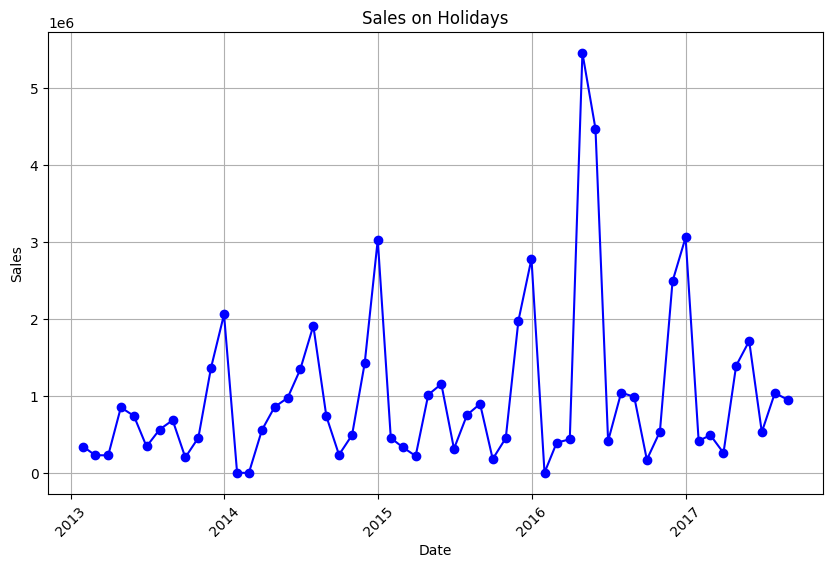

In [56]:
monthly_sales_data_holiday = sales_data.resample('M').sum()

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales_data_holiday.index, monthly_sales_data_holiday.sales, marker='o', linestyle='-', color='b')
plt.title('Sales on Holidays')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)

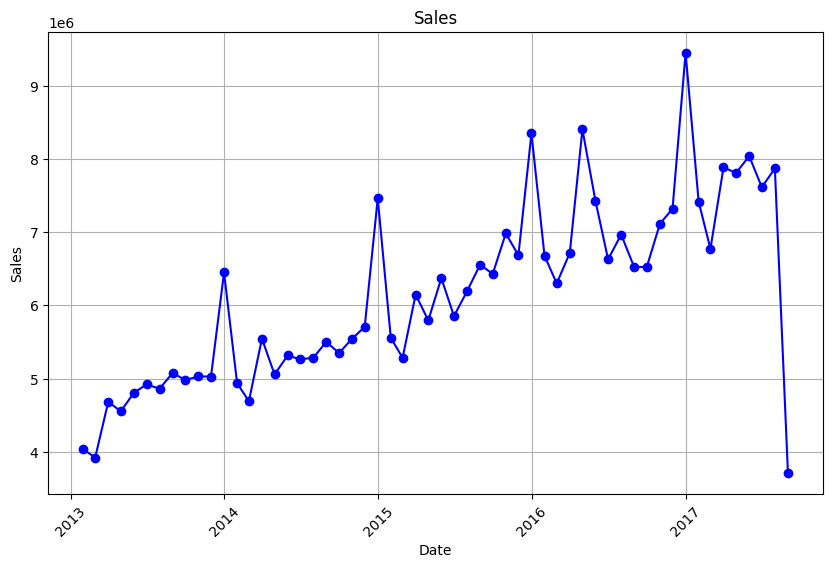

In [57]:
monthly_sales_data = df_train.resample('M').sum()

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales_data.index, monthly_sales_data.sales, marker='o', linestyle='-', color='b')
plt.title('Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)

## Checking for Outliers in the data

In [58]:
df_train = df_train.drop('family', axis=1)
df_train

,id,store_nbr,sales,onpromotion,holiday
date,,,,,
2013-01-01,12,1,0.000,0,True
2013-01-01,45,10,0.000,0,True
2013-01-01,78,11,0.000,0,True
2013-01-01,111,12,0.000,0,True
2013-01-01,144,13,0.000,0,True
...,...,...,...,...,...
2017-08-15,3000735,54,4235.000,44,True
2017-08-15,3000768,6,4334.000,33,True
2017-08-15,3000801,7,3678.000,34,True


In [59]:
df_train.dtypes

id               int64
store_nbr        int64
sales          float64
onpromotion      int64
holiday           bool
dtype: object

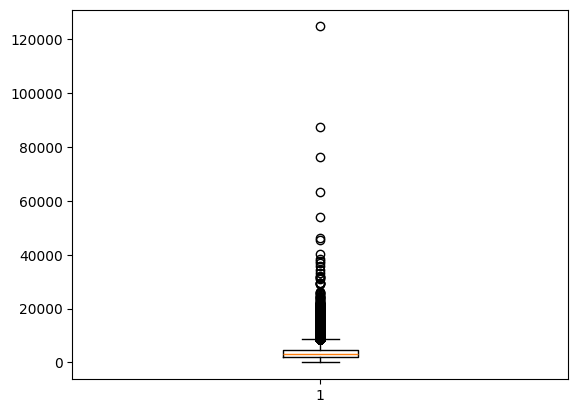

In [61]:
plt.boxplot(df_train['sales']);